# Airbnb Hotel Booking Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Airbnb_Open_Data.csv to Airbnb_Open_Data.csv


In [ ]:
df = pd.read_csv('Airbnb_Open_Data.csv')

/tmp/ipython-input-2167922700.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv')


In [ ]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [ ]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [ ]:
df.duplicated().sum()

np.int64(541)

In [ ]:
df[df['neighbourhood group'] == "brookIn" ]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license


In [ ]:
df.drop_duplicates(inplace=True)

df.drop(['house_rules','license'],axis=1,inplace=True)

df['price'] = df['price'].str.replace('$','',regex=False)
df['service fee'] = df['service fee'].str.replace(',','',regex=False)

df['price'] = df['price'].str.replace(',','',regex=False)
df['service fee'] = df['service fee'].str.replace('$','',regex=False)

df.rename(columns={
    'price':'price(usd)',
    'service fee':'service_fee(usd)'
},inplace=True)


In [ ]:
df.dropna(inplace=True)

In [ ]:
df['price(usd)']= df['price(usd)'].astype(float)
df['service_fee(usd)']= df['service_fee(usd)'].astype(float)
df['id']= df['id'].astype(str)
df['host id']= df['host id'].astype(str)
df['last review']= pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

In [ ]:
df.duplicated().value_counts()

,count
False,83412


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83412 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83412 non-null  int64         
 1   NAME                            83412 non-null  object        
 2   host id                         83412 non-null  int64         
 3   host_identity_verified          83412 non-null  object        
 4   host name                       83412 non-null  object        
 5   neighbourhood group             83412 non-null  object        
 6   neighbourhood                   83412 non-null  object        
 7   lat                             83412 non-null  float64       
 8   long                            83412 non-null  float64       
 9   country                         83412 non-null  object        
 10  country code                    83412 non-null  object        
 11  instan

In [ ]:
df.describe()

,id,host id,lat,long,Construction year,price(usd),service_fee(usd),minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,8.341200e+04,8.341200e+04,83412.000000,83412.000000,83412.000000,83412.000000,83412.000000,83412.000000,83412.000000,83412,83412.000000,83412.000000,83412.000000,83412.000000
mean,2.957469e+07,4.918564e+10,40.727354,-73.948500,2012.488467,626.219441,125.245049,7.405313,32.279037,2019-06-08 22:01:05.256797696,1.377606,3.278797,7.032609,141.784995
min,1.001254e+06,1.236005e+08,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.541402e+07,2.444899e+10,40.687650,-73.982110,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-26 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,3.075788e+07,4.902732e+10,40.721320,-73.953720,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,4.331497e+07,7.385098e+10,40.762600,-73.930817,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,5.735803e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.621861e+07,2.853593e+10,0.056325,0.050347,5.760848,331.790851,66.361709,28.102056,51.962067,NaN,1.751042,1.283606,29.551420,133.928159


In [ ]:
property_types = df['room type'].value_counts()
property_types

,count
room type,
Entire home/apt,44164
Private room,37494
Shared room,1646
Hotel room,108


Text(0.5, 1.0, 'Room Type Distribution')

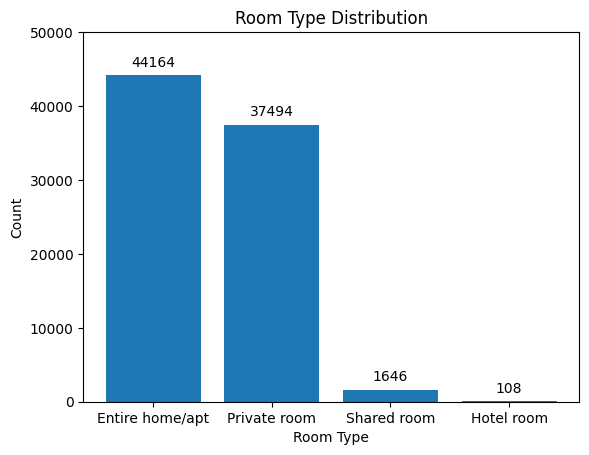

In [ ]:
room_type = plt.bar(property_types.index,property_types);
plt.bar_label(room_type,labels = property_types,padding=4);
plt.ylim([0,50000]) # Changed ylim to accommodate the bar heights
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.title("Room Type Distribution")

In [ ]:
hoof_group = df['neighbourhood group'].value_counts()
hoof_group

,count
neighbourhood group,
Brooklyn,34635
Manhattan,34567
Queens,11126
Bronx,2267
Staten Island,816
brookln,1


Text(0.5, 1.0, 'Neighbourhood Group Distribution')

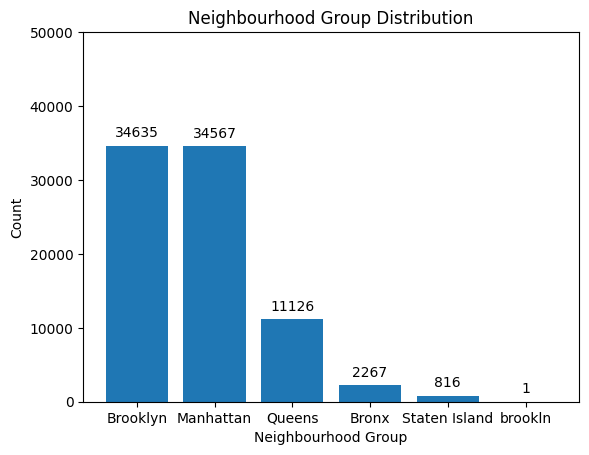

In [ ]:
hood_type = plt.bar(hoof_group.index,hoof_group);
plt.bar_label(hood_type,labels = hoof_group,padding=4);
plt.ylim([0,50000]) # Changed ylim to accommodate the bar heights
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count")
plt.title("Neighbourhood Group Distribution")

In [ ]:
avg_price = df.groupby('neighbourhood group')['price(usd)'].mean().sort_values(ascending=False).to_frame()
avg_price

,price(usd)
neighbourhood group,
Queens,630.457127
Bronx,630.201147
Brooklyn,627.438054
Manhattan,623.471143
Staten Island,622.132353
brookln,580.000000


Text(0.5, 1.0, 'Average Price by Neighbourhood Group')

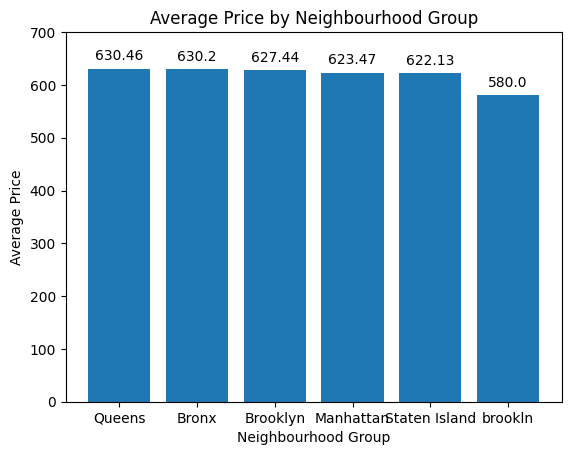

In [ ]:
avg_price_bar = plt.bar(avg_price.index,avg_price['price(usd)']);
plt.bar_label(avg_price_bar,labels = round(avg_price['price(usd)'],2),label_type='edge',padding=4);
plt.ylim([0,700]) # Changed ylim to accommodate the bar heights
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Price")
plt.title("Average Price by Neighbourhood Group")

Text(0.5, 1.0, 'Average Price by Construction Year')

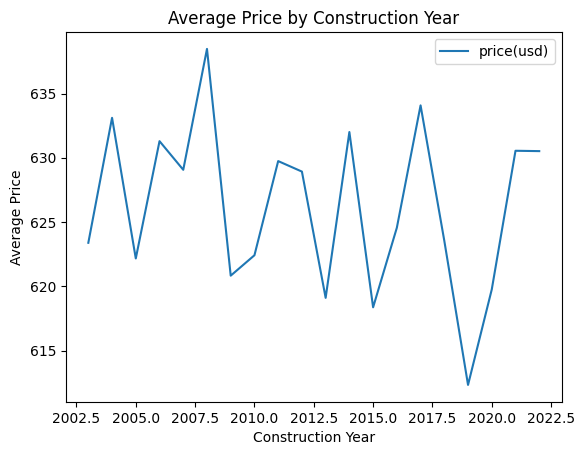

In [ ]:
df.groupby(df['Construction year'])['price(usd)'].mean().to_frame().plot()
plt.xlabel("Construction Year")
plt.ylabel("Average Price")
plt.title("Average Price by Construction Year")

In [ ]:
host = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
host

,calculated host listings count
host name,
Sonder (NYC),111921.0
Karen,42410.0
Jeniffer,31447.0
Blueground,21168.0
Kaz,17552.0
Corporate Housing,14833.0
Soya,10260.0
Stay With Vibe,10260.0
Kara,10092.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sonder (NYC)'),
  Text(1, 0, 'Karen'),
  Text(2, 0, 'Jeniffer'),
  Text(3, 0, 'Blueground'),
  Text(4, 0, 'Kaz'),
  Text(5, 0, 'Corporate Housing'),
  Text(6, 0, 'Soya'),
  Text(7, 0, 'Stay With Vibe'),
  Text(8, 0, 'Kara'),
  Text(9, 0, 'Jeremy & Laura')])

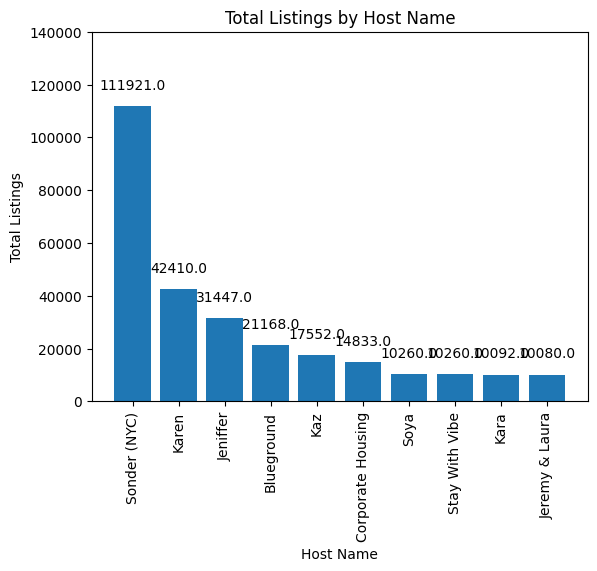

In [ ]:
host_bar = plt.bar(host.index,host['calculated host listings count']);
plt.bar_label(host_bar,labels = host['calculated host listings count'],padding=10);
plt.ylim([0,140000]) # Changed ylim to accommodate the bar heights
plt.xlabel("Host Name")
plt.ylabel("Total Listings")
plt.title("Total Listings by Host Name")
plt.xticks(rotation=90)

#

In [ ]:
review = df.groupby('neighbourhood group')['last review'].count().sort_values(ascending=False).to_frame()
review

,last review
neighbourhood group,
Brooklyn,34635
Manhattan,34567
Queens,11126
Bronx,2267
Staten Island,816
brookln,1


Text(0.5, 1.0, 'Total Reviews by Neighbourhood Group')

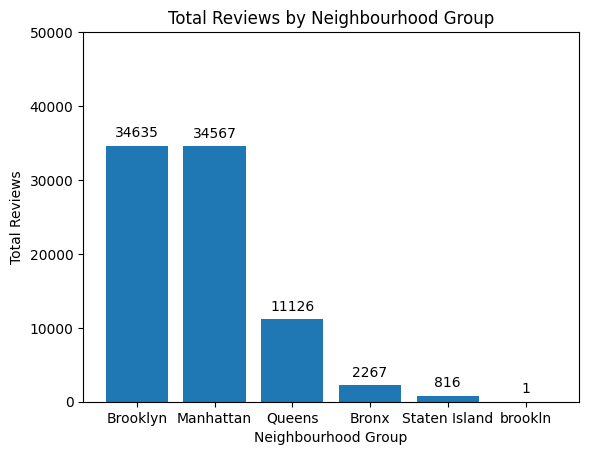

In [ ]:
review_bar = plt.bar(review.index,review['last review']);
plt.bar_label(review_bar,labels = review['last review'],padding=4);
plt.ylim([0,50000]) # Changed ylim to accommodate the bar heights
plt.xlabel("Neighbourhood Group")
plt.ylabel("Total Reviews")
plt.title("Total Reviews by Neighbourhood Group")
#

In [ ]:
df['price(usd)'].corr(df['service_fee(usd)'])

np.float64(0.9999909077291451)

Text(0.5, 1.0, 'Price vs Service Fee')

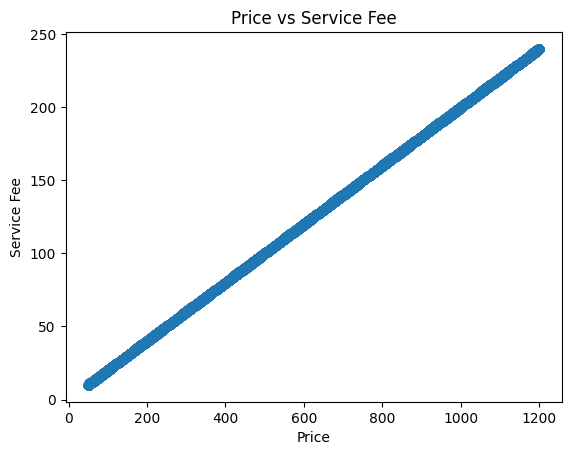

In [ ]:
sns.regplot(df,x='price(usd)',y='service_fee(usd)')
plt.xlabel("Price")
plt.ylabel("Service Fee")
plt.title("Price vs Service Fee")


In [ ]:
ARRN = df.groupby(['neighbourhood group','room type'])['review rate number'].mean().sort_values(ascending=False).to_frame()
ARRN

review rate number
neighbourhood group room type                          
brookln             Private room               4.000000
Brooklyn            Hotel room                 3.833333
Queens              Hotel room                 3.750000
Staten Island       Shared room                3.714286
Manhattan           Hotel room                 3.500000
Staten Island       Private room               3.497449
Bronx               Entire home/apt            3.381881
                    Shared room                3.356322
Queens              Entire home/apt            3.350045
Staten Island       Entire home/apt            3.333333
Queens              Shared room                3.327402
Brooklyn            Shared room                3.323383
Queens              Private room               3.310847
Bronx               Private room               3.305810
Manhattan           Private room               3.285605
Brooklyn            Private room               3.274860
Manhattan           Entire home/apt            3.268930
                    Shared room                3.261976
Brooklyn            Entire home/apt            3.242491

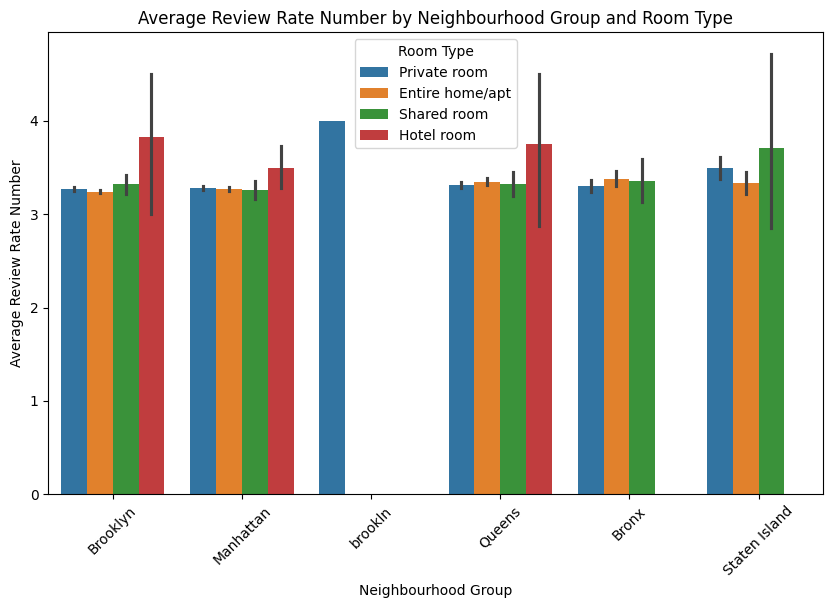

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='neighbourhood group',y='review rate number',hue='room type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate Number')
plt.title('Average Review Rate Number by Neighbourhood Group and Room Type')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()

Text(0.5, 1.0, 'Total Listings vs Availability')

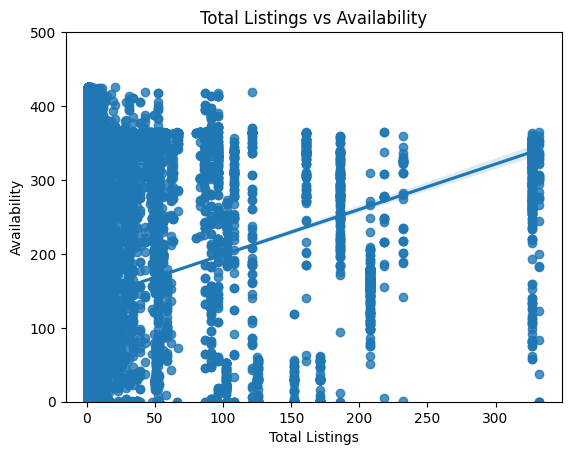

In [ ]:
sns.regplot(df,x='calculated host listings count',y='availability 365')
plt.ylim([0,500])
plt.xlabel("Total Listings")
plt.ylabel("Availability")
plt.title("Total Listings vs Availability")

In [ ]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.13535172019881483)